In [1]:
import pandas as pd
from pycaret import regression


train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12759 entries, 0 to 12758
Data columns (total 83 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               12759 non-null  object 
 1   number_of_elements               12759 non-null  int64  
 2   mean_atomic_mass                 12759 non-null  float64
 3   wtd_mean_atomic_mass             12759 non-null  float64
 4   gmean_atomic_mass                12759 non-null  float64
 5   wtd_gmean_atomic_mass            12759 non-null  float64
 6   entropy_atomic_mass              12759 non-null  float64
 7   wtd_entropy_atomic_mass          12759 non-null  float64
 8   range_atomic_mass                12759 non-null  float64
 9   wtd_range_atomic_mass            12759 non-null  float64
 10  std_atomic_mass                  12759 non-null  float64
 11  wtd_std_atomic_mass              12759 non-null  float64
 12  mean_fie          

<AxesSubplot: >

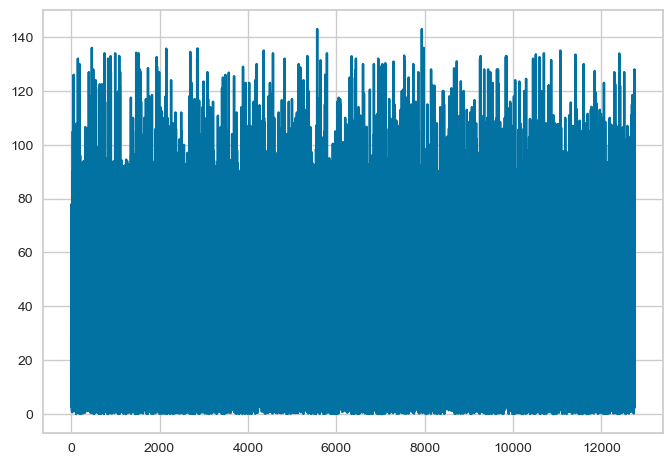

In [9]:
train[train['critical_temp']<150]['critical_temp'].plot()

In [10]:
train = train.drop('ID',axis=1)
regression.setup(data=train[train['critical_temp']<150],target='critical_temp',
                 fold_strategy='kfold',
                 fold=10,
                 session_id=42)

,Description,Value
0,Session id,42
1,Target,critical_temp
2,Target type,Regression
3,Original data shape,"(12758, 82)"
4,Transformed data shape,"(12758, 82)"
5,Transformed train set shape,"(8930, 82)"
6,Transformed test set shape,"(3828, 82)"
7,Numeric features,81
8,Preprocess,True
9,Imputation type,simple


In [11]:
best = regression.compare_models(sort='MAE',n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,5.8025,107.2740,10.3457,0.9097,0.4130,5.5729,7.5830
rf,Random Forest Regressor,6.1270,110.7809,10.5177,0.9067,0.4260,5.8823,15.1640
xgboost,Extreme Gradient Boosting,6.4465,118.3119,10.8716,0.9004,0.4630,5.7425,7.0690
catboost,CatBoost Regressor,6.5557,112.8789,10.6159,0.9050,0.4778,6.4448,10.9410
lightgbm,Light Gradient Boosting Machine,6.7790,117.4069,10.8296,0.9012,0.4908,7.1996,5.7980
dt,Decision Tree Regressor,7.3224,186.5827,13.6503,0.8430,0.5115,5.6488,5.6370
knn,K Neighbors Regressor,7.3855,163.4676,12.7723,0.8625,0.4757,6.9279,5.7190
gbr,Gradient Boosting Regressor,8.8245,165.2594,12.8480,0.8609,0.6009,7.9018,8.3910
lr,Linear Regression,13.7839,321.0509,17.9118,0.7299,0.8576,23.6940,6.0550
br,Bayesian Ridge,13.8760,323.3891,17.9774,0.7280,0.8551,25.6210,5.4820


In [ ]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(random_seed=77,n_estimators=20000,loss_function='MAE',verbose=1000,max_depth=11)
cat.fit(train.drop(['critical_temp'],axis=1),train['critical_temp'])

0:	learn: 26.7382130	total: 218ms	remaining: 1h 12m 33s
1000:	learn: 3.4918923	total: 4m 3s	remaining: 1h 17m 8s


In [31]:
cat.predict(test.drop('ID',axis=1))

array([ 2.10078706,  4.28375694, 13.31890601, ..., 11.17062395,
       19.30060864,  1.88318598])

In [30]:
sub = pd.read_csv('./sample_submission.csv')
sub['critical_temp'] = cat.predict(test.drop('ID',axis=1))
sub = sub.set_index('ID')
sub.to_csv('./sample.csv')